In this notebook we show how to sort according to time the fields stored in a netCDF.     
For example, the Black Sea climatology: https://www.seadatanet.org/Products#/metadata/ad2d0efc-7191-4949-8092-796397106290.

In [1]:
using NCDatasets
using PyPlot

## Files and directories
Adapt the path and file name.

In [36]:
datadir = "/data/SeaDataCloud/"
refefile = joinpath(datadir, "SDC_BLS_CLIM_S_1955_2017_0125_m.4Danl_ori.nc")
datafile = joinpath(datadir, "SDC_BLS_CLIM_S_1955_2017_0125_m.4Danl.nc")
isfile(datafile) & isfile(refefile)

true

In [40]:
function sort_fields_time(datafile::String)
    Dataset(datafile::String, "a") do ds
        
        @debug("Read time and sort index")
        times = ds["time"][:];
        sorting_index = sortperm(times);
        
        # Loop on the variables
        for varname in keys(ds)

            # Check if time is a dimension
            if "time" ∈ dimnames(ds[varname])
                @debug("Variable '$(varname)' contains 'time' dimension")
                var = ds[varname][:]
                ndims = length(size(var))
                @debug("Number of dimensions: $(ndims)")
                if ndims == 1
                    ds[varname][:] = var[sorting_index]
                elseif ndims == 2
                    ds[varname][:] = var[:,sorting_index]
                elseif ndims == 3
                    ds[varname][:] = var[:,:,sorting_index]
                elseif ndims == 4
                    ds[varname][:] = var[:,:,:,sorting_index]
                else
                    @warn("Number of dimensions larger than 4")
                end
            end
        end
    end
end

sort_fields_time (generic function with 1 method)

In [41]:
@time sort_fields_time(datafile);

  8.161447 seconds (104.33 k allocations: 1004.135 MiB, 1.95% gc time)


## Checking
We will plot the time of the 2 files to check it is sorted.

In [42]:
function load_time(datafile::String)
    Dataset(datafile) do ds
        time = ds["time"][:]
        climatology_bounds = ds["climatology_bounds"][:]
        return time, climatology_bounds
    end
end

load_time (generic function with 1 method)

In [43]:
t1, cb1 = load_time(refefile);
t2, cb2 = load_time(datafile);

([Dates.DateTime("1974-01-16T00:00:00"), Dates.DateTime("1974-02-16T00:00:00"), Dates.DateTime("1974-03-16T00:00:00"), Dates.DateTime("1974-04-16T00:00:00"), Dates.DateTime("1974-05-16T00:00:00"), Dates.DateTime("1974-06-16T00:00:00"), Dates.DateTime("1974-07-16T00:00:00"), Dates.DateTime("1974-08-16T00:00:00"), Dates.DateTime("1974-09-16T00:00:00"), Dates.DateTime("1974-10-16T00:00:00")  …  Dates.DateTime("2006-03-16T00:00:00"), Dates.DateTime("2006-04-16T00:00:00"), Dates.DateTime("2006-05-16T00:00:00"), Dates.DateTime("2006-06-16T00:00:00"), Dates.DateTime("2006-07-16T00:00:00"), Dates.DateTime("2006-08-16T00:00:00"), Dates.DateTime("2006-09-16T00:00:00"), Dates.DateTime("2006-10-16T00:00:00"), Dates.DateTime("2006-11-16T00:00:00"), Dates.DateTime("2006-12-16T00:00:00")], [Dates.DateTime("1955-01-01T00:00:00") Dates.DateTime("1955-02-01T00:00:00") … Dates.DateTime("1995-11-01T00:00:00") Dates.DateTime("1995-12-01T00:00:00"); Dates.DateTime("1994-01-31T00:00:00") Dates.DateTime("1994

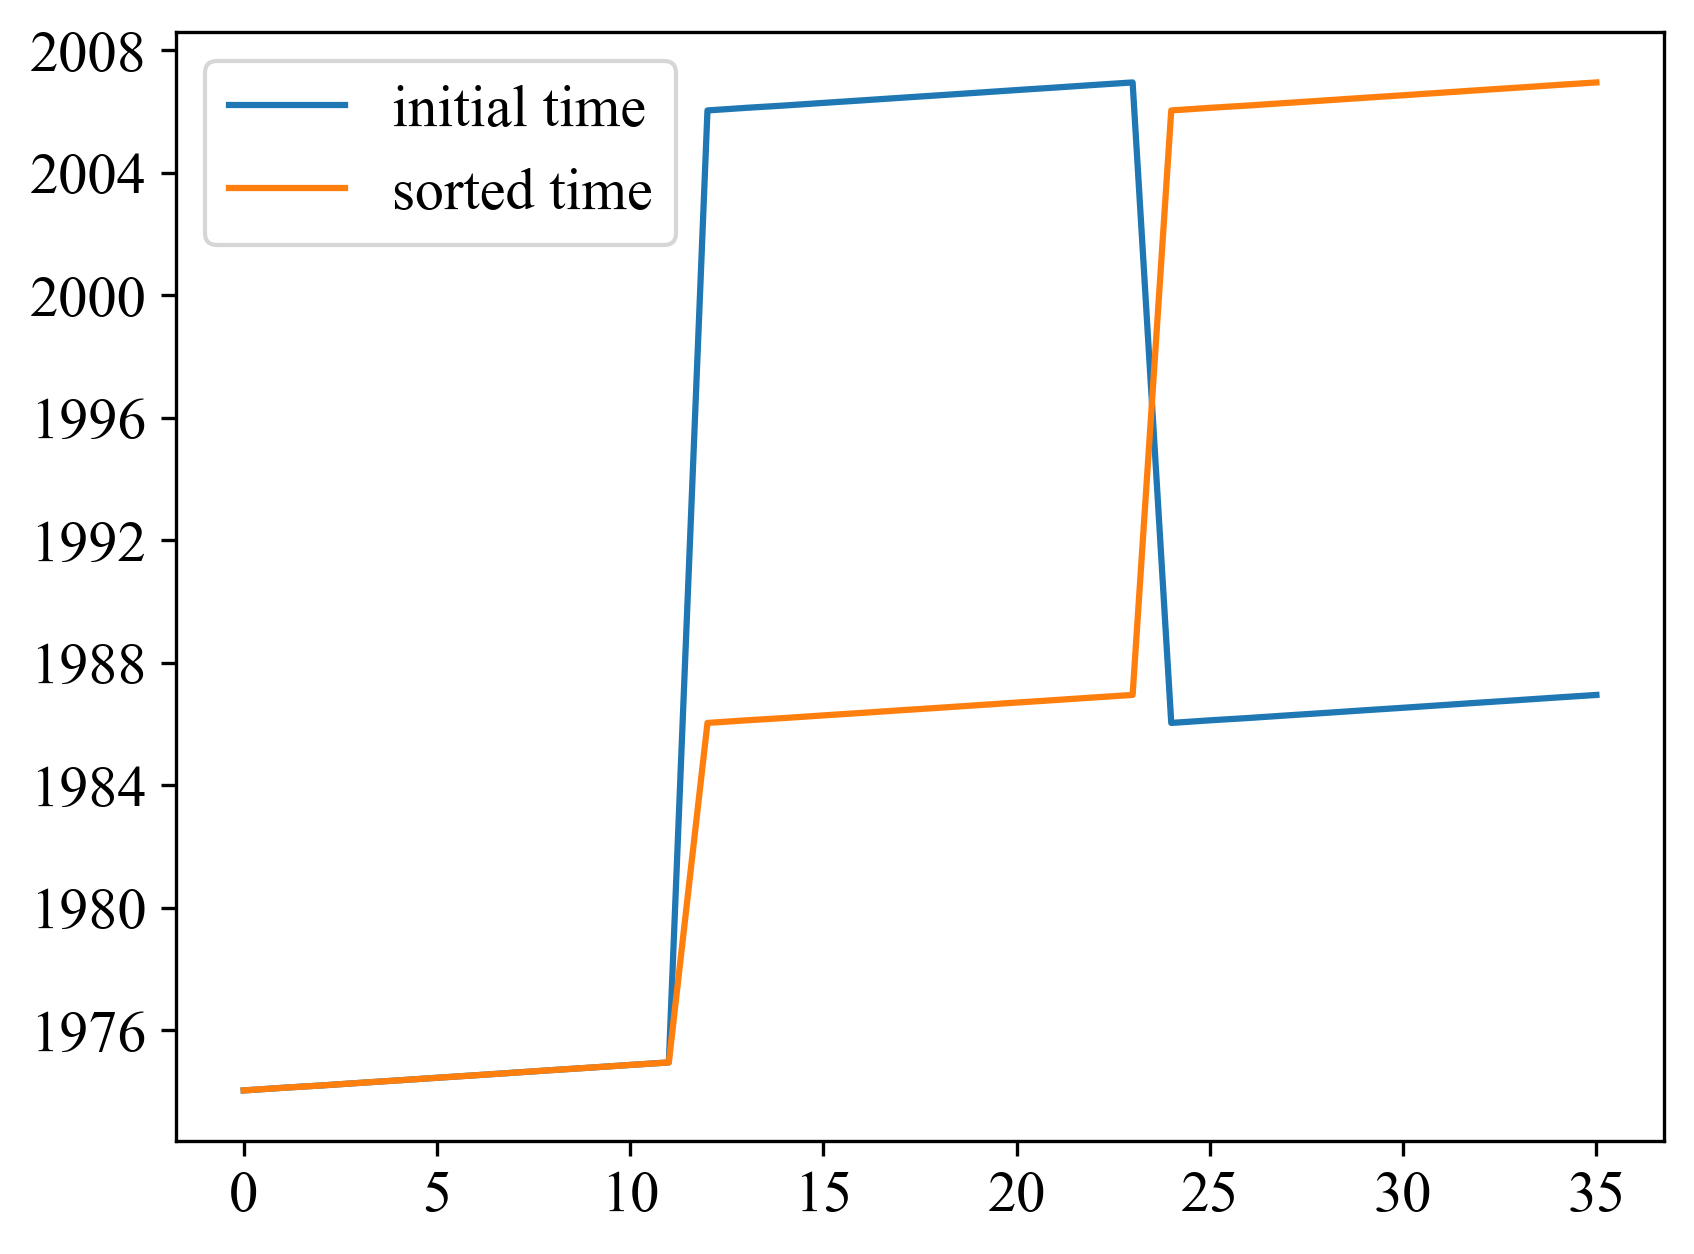

In [48]:
fig = PyPlot.figure()
ax1 = PyPlot.subplot(111)
PyPlot.plot(t1, label="initial time")
PyPlot.plot(t2, label="sorted time")
legend()
#ax2 = PyPlot.subplot(122)
#PyPlot.plot(cb1[1,:])
#PyPlot.plot(cb2[1,:])
PyPlot.show()